In [46]:
from vega_datasets import data
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
# Resample by the day and take the average temperature. Visualize the average temperature over time.
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
df = df.set_index('date')
df


,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


<Axes: xlabel='date'>

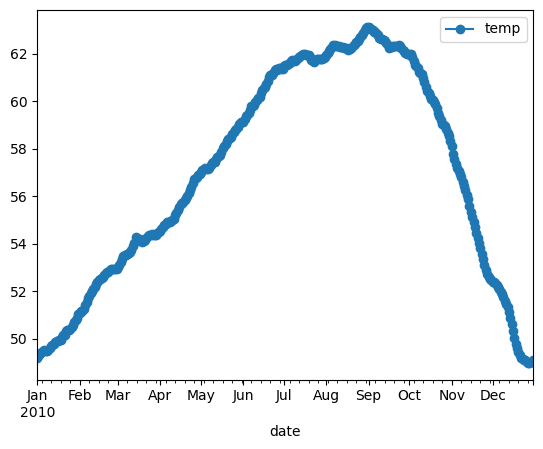

In [5]:
df.resample('1D').mean().plot(marker='o')

<Axes: xlabel='date'>

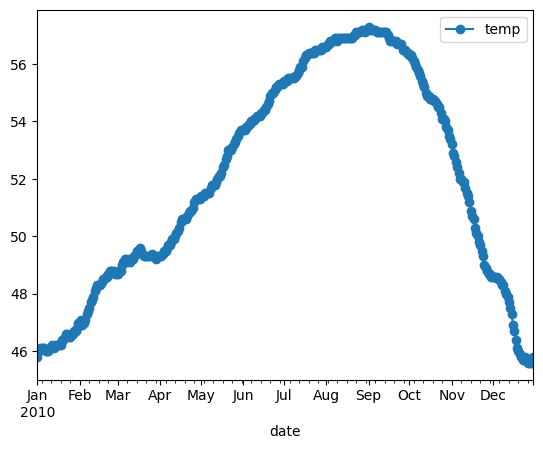

In [6]:
# Write the code necessary to visualize the minimum temperature over time.
df.resample('1D').min().plot(marker='o')

<Axes: xlabel='date'>

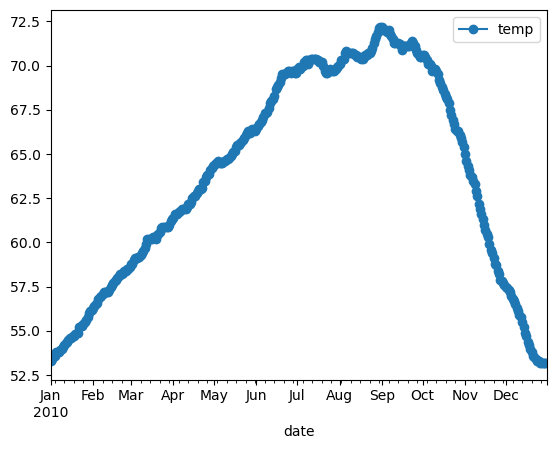

In [7]:
# Write the code necessary to visualize the maximum temperature over time.
df.resample('1D').max().plot(marker='o')

In [8]:
# Which month is the coldest, on average?
df.resample('1M').mean()
# jan

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [9]:
# Which month has the highest average temperature?
# sept

In [10]:
# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
# Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
df= df.resample('1D').agg(['min', 'max'])
df

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [11]:
df['day_temp_dif'] = (df.temp['max'] - df.temp['min'])
df.resample('1M').max()
# aug

temp       day_temp_dif
             min   max             
date                               
2010-01-31  47.0  56.2          9.3
2010-02-28  48.8  58.6          9.9
2010-03-31  49.6  61.3         12.0
2010-04-30  51.3  64.3         13.0
2010-05-31  53.7  66.4         13.1
2010-06-30  55.3  69.7         14.8
2010-07-31  56.6  70.4         14.8
2010-08-31  57.2  72.2         15.0
2010-09-30  57.3  72.2         14.9
2010-10-31  56.3  70.6         14.4
2010-11-30  53.2  65.0         11.8
2010-12-31  48.6  57.5          8.9

In [12]:
df = data.seattle_weather()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [13]:
# Which year and month combination has the highest amount of precipitation?
df = df.set_index('date')
df


,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [14]:
# 2015-03-31		
df.precipitation.resample('1M').agg(['min', 'max'])

,min,max
date,,
2012-01-31,0.0,27.7
2012-02-29,0.0,17.3
2012-03-31,0.0,27.4
2012-04-30,0.0,10.9
2012-05-31,0.0,18.5
2012-06-30,0.0,16.5
2012-07-31,0.0,15.2
2012-08-31,0.0,0.0
2012-09-30,0.0,0.3


<Axes: xlabel='date'>

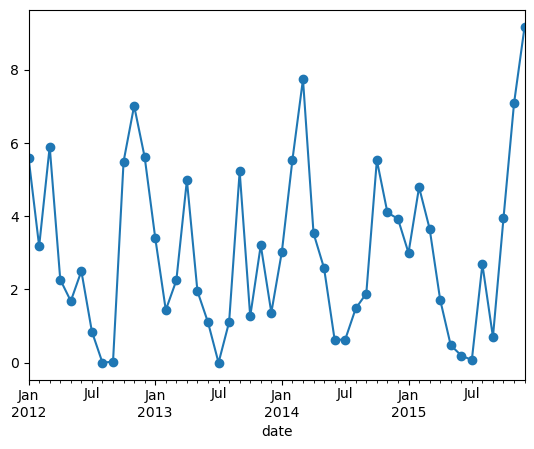

In [15]:
# Visualize the amount of monthly precipitation over time.
df.precipitation.resample('1M').mean().plot(marker='o')


<Axes: xlabel='date'>

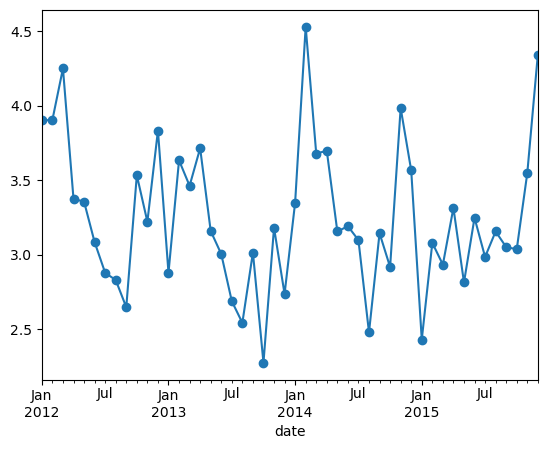

In [16]:
# Visualize the amount of wind over time. Choose a time interval you think is appropriate.
df.wind.resample('1M').mean().plot(marker='o')


In [17]:
# Which year-month combination is the windiest?
# feb 2014


In [18]:
# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
# df.weather.resample('1Y').sum()

In [19]:
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [20]:
sunny_days = df[df['weather'] == 'sun']

sunny_days_by_year = sunny_days.groupby(sunny_days.index.year)['weather'].count()

max_sunny_year = sunny_days_by_year.idxmax()

max_sunny_year

2014

In [21]:
# In which month does it rain the most?
rainy_days = df[df['weather'] == 'rain']

rainy_days_by_month = rainy_days.groupby(rainy_days.index.month)['weather'].count()

max_rainy_month = rainy_days_by_month.idxmax()

max_rainy_month
# feb

2

In [22]:
# Which month has the most number of days with a non-zero amount of precipitation?
no_rain_days = df[df['precipitation'] != '0']

no_rain_days_by_month = no_rain_days.groupby(no_rain_days.index.month)['precipitation'].count()

less_no_rain_month = no_rain_days_by_month.idxmax()

less_no_rain_month
# jan

1

In [23]:
df = data.flights_20k()
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [24]:
df = df.set_index('date')
df

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,-6,1489,SEA,MCI
2001-02-07 11:37:00,-16,1848,MCO,PHX


In [25]:
df.dtypes

delay           int64
distance        int64
origin         object
destination    object
dtype: object

In [26]:
# Convert any negative delays to 0.
num = df._get_numeric_data()

num[num < 0] = 0

In [27]:
df

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,0,1489,SEA,MCI
2001-02-07 11:37:00,0,1848,MCO,PHX


In [37]:
# Which hour of the day has the highest average delay?
df._get_numeric_data().resample('1h').mean().bfill().delay.max()



360.0

In [38]:
df[df['delay'] == 360]

,delay,distance,origin,destination
date,,,,
2001-02-23 03:25:00,360,239,DAL,HOU


In [42]:
df

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,0,1489,SEA,MCI
2001-02-07 11:37:00,0,1848,MCO,PHX


In [43]:
# Does the day of the week make a difference in the delay amount?
df.resample('1d').delay.mean()


date
2001-01-01     8.747126
2001-01-02    21.808411
2001-01-03    17.150000
2001-01-04     7.176724
2001-01-05     9.294118
                ...    
2001-03-27     4.669683
2001-03-28     3.551282
2001-03-29    13.545455
2001-03-30     8.893162
2001-03-31     7.000000
Freq: D, Name: delay, Length: 90, dtype: float64

In [44]:
df['day'] = df.index.day_name()

In [45]:
weekday_delay = df.groupby('day').delay.mean().sort_values(ascending=False)


In [ ]:
weekday_delay.plot()
plt.title('Average Delay (in minutes) by Weekday')
plt.ylabel('Average Delay in Minutes')
plt.show()

In [47]:
df['month'] = df.index.month_name()


In [48]:
monthly_delay = df.groupby('month').delay.mean()
monthly_delay

month
February   12.31
January    11.30
March       9.88
Name: delay, dtype: float64

In [49]:
df.month.value_counts()


month
March       6960
January     6784
February    6256
Name: count, dtype: int64

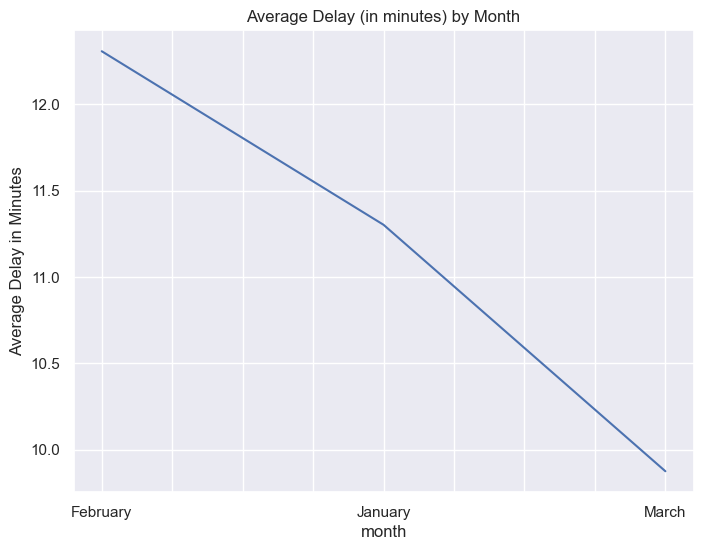

In [50]:
monthly_delay.plot()
plt.title('Average Delay (in minutes) by Month')
plt.ylabel('Average Delay in Minutes')
plt.show()